## 1. Problem Description

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## 2. Data Collection

In [2]:
## import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv("Travel.csv")

In [4]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


## 3. Data Cleaning

### Handling missing values
1. Handling missing values
2. Handling duplicates
3. Check datatypes
4. Understand the dataset

In [5]:
## check for null values
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
## Check for categorical features
df["Gender"].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [7]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [8]:
df["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [9]:
df["Gender"]=df["Gender"].replace("Fe Male","Female")

In [10]:
df["Gender"].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [11]:
df["MaritalStatus"]=df["MaritalStatus"].replace("Single","Unmarried")

In [12]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [13]:
## Check for missing values
## Get the features with nan values
features_with_nan=[feature for feature in df.columns if df[feature].isna().sum()>=1]
for feature in features_with_nan:
    print(feature,np.round(df[feature].isna().mean()*100,2),"% missing values")

Age 4.62 % missing values
TypeofContact 0.51 % missing values
DurationOfPitch 5.14 % missing values
NumberOfFollowups 0.92 % missing values
PreferredPropertyStar 0.53 % missing values
NumberOfTrips 2.86 % missing values
NumberOfChildrenVisiting 1.35 % missing values
MonthlyIncome 4.77 % missing values


In [14]:
## Stats on numerical features
df[features_with_nan].select_dtypes(exclude="object").describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Impute the missing value

In [15]:
## Impute median for age
df.Age.fillna(df.Age.median(),inplace=True)

## Impute mode for TypeofContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

## Impute median for DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

## Impute mode for NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

## Impute mode for PreferredPropertyStart
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

## Impute median for NumberofTripes
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

## Impute mode for NumberofChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

## Impute median for Monthlyincome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [16]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
df.drop("CustomerID",inplace=True,axis=1)

## Featue Engineering

In [18]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [19]:
## Reduce NumberOfPersonVisiting and NumberOfChildrenVisiting into TotalVisiting
df["TotalVisiting"]=df["NumberOfPersonVisiting"]+df["NumberOfChildrenVisiting"]
df.drop(columns=["NumberOfPersonVisiting","NumberOfChildrenVisiting"],axis=1,inplace=True)

In [20]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [21]:
## Getting all numerical featues
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print(f"Total Numeical Features:{len(num_features)}")

Total Numeical Features:12


In [22]:
## Getting all categorical featues
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(f"Total Categorical Features:{len(cat_features)}")

Total Categorical Features:6


In [23]:
## Getting all discrete featues
dis_features=[feature for feature in num_features if df[feature].nunique()<=25]
print(f"Total Discrete Features:{len(dis_features)}")

Total Discrete Features:9


In [24]:
## Getting all continious featues
con_features=[feature for feature in num_features if df[feature].nunique()>25]
print(f"Total Continious Features:{len(con_features)}")

Total Continious Features:3


In [25]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


## Train test split

In [26]:
from sklearn.model_selection import train_test_split
X=df.drop(["ProdTaken"],axis=1)
Y=df["ProdTaken"]

In [27]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [28]:
Y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [32]:
## Create Column Transformer with 3 types of transformers
cat_features=X.select_dtypes(include="object").columns
num_features=X.select_dtypes(exclude="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop="first")
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScalar",numeric_transformer,num_features)
    ]
)

In [35]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScalar', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [36]:
## Apply transformation in training Data
X_train=preprocessor.fit_transform(X_train)

In [40]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [41]:
X_test=preprocessor.transform(X_test) 

In [43]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,-0.287333,1.284279,-0.725271,-1.220627,-0.632399,-0.777720,-1.277194,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366823,-0.531672,0.282777,0.522885,-1.220627,1.581280,1.408395,-1.277194,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,0.812193,0.282777,-0.725271,0.965153,-0.632399,1.408395,0.782966,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,2.522566,2.285781,-0.725271,1.511598,-0.632399,-0.049015,0.782966,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,-1.020350,0.282777,0.522885,-0.127737,1.581280,0.679690,0.782966,-0.317047,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,-0.725271,1.511598,-0.632399,1.408395,0.782966,0.498219,0.643615
974,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.142519,0.282777,1.771041,-0.674182,1.581280,-1.506426,-1.277194,-1.184015,-1.483035
975,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,1.056532,1.284279,-0.725271,-0.674182,1.581280,1.408395,0.782966,0.690012,0.643615
976,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.287333,-2.721728,-0.725271,-0.674182,-0.632399,1.408395,0.782966,-0.228278,-0.774151


## Model Training 

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [52]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)
    
    ## Make predictions
    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)

    ## Training set performance
    model_train_accuracy=accuracy_score(Y_train,Y_train_pred)
    model_train_f1=f1_score(Y_train,Y_train_pred,average="weighted")
    model_train_precision=precision_score(Y_train,Y_train_pred)
    model_train_recall=recall_score(Y_train,Y_train_pred)
    model_train_rocauc_score=roc_auc_score(Y_train,Y_train_pred)

    ## Test set performance
    model_test_accuracy=accuracy_score(Y_test,Y_test_pred)
    model_test_f1=f1_score(Y_test,Y_test_pred,average="weighted")
    model_test_precision=precision_score(Y_test,Y_test_pred)
    model_test_recall=recall_score(Y_test,Y_test_pred)
    model_test_rocauc_score=roc_auc_score(Y_test,Y_test_pred)

    print(list(models.keys())[i])
    print("Model Performance for training set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

    print("-"*35)

    print("Model Performance for test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))

    print("="*35)
    print()
    
    

Logistic Regression
Model Performance for training set
- Accuracy: 0.8458
- F1 Score: 0.8200
- Precision: 0.6994
- Recall: 0.3032
- Roc Auc Score: 0.6366
-----------------------------------
Model Performance for test set
- Accuracy: 0.8354
- F1 Score: 0.8078
- Precision: 0.6829
- Recall: 0.2932
- Roc Auc Score: 0.6301

Decision Tree
Model Performance for training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------
Model Performance for test set
- Accuracy: 0.9141
- F1 Score: 0.9134
- Precision: 0.7923
- Recall: 0.7592
- Roc Auc Score: 0.8554

Random Forest
Model Performance for training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------
Model Performance for test set
- Accuracy: 0.9254
- F1 Score: 0.9192
- Precision: 0.9683
- Recall: 0.6387
- Roc Auc Score: 0.8168



### Hyperparameter Tuning

In [53]:
rf_params={
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [54]:
## Model list for Hyperparameter tuning
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params),
]

In [55]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=1
    )
    random.fit(X_train,Y_train)
    model_param[name]=random.best_params_
for model_name in model_param:
    print(f"--------------- Best Params for {model_name} --------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=1000; total time=   4.8s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=1000; total time=   4.8s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=1000; total time=   5.4s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=5, min_samples_s

In [56]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=15)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)
    
    ## Make predictions
    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)

    ## Training set performance
    model_train_accuracy=accuracy_score(Y_train,Y_train_pred)
    model_train_f1=f1_score(Y_train,Y_train_pred,average="weighted")
    model_train_precision=precision_score(Y_train,Y_train_pred)
    model_train_recall=recall_score(Y_train,Y_train_pred)
    model_train_rocauc_score=roc_auc_score(Y_train,Y_train_pred)

    ## Test set performance
    model_test_accuracy=accuracy_score(Y_test,Y_test_pred)
    model_test_f1=f1_score(Y_test,Y_test_pred,average="weighted")
    model_test_precision=precision_score(Y_test,Y_test_pred)
    model_test_recall=recall_score(Y_test,Y_test_pred)
    model_test_rocauc_score=roc_auc_score(Y_test,Y_test_pred)

    print(list(models.keys())[i])
    print("Model Performance for training set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

    print("-"*35)

    print("Model Performance for test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))

    print("="*35)
    print()
    

Random Forest
Model Performance for training set
- Accuracy: 0.9992
- F1 Score: 0.9992
- Precision: 1.0000
- Recall: 0.9959
- Roc Auc Score: 0.9979
-----------------------------------
Model Performance for test set
- Accuracy: 0.9387
- F1 Score: 0.9346
- Precision: 0.9781
- Recall: 0.7016
- Roc Auc Score: 0.8489



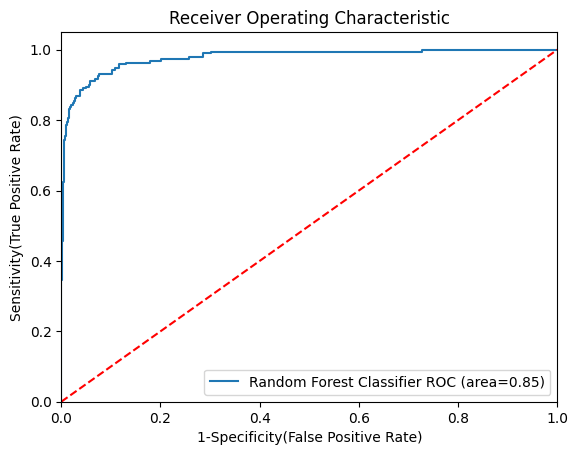

In [59]:
## Plotting ROC AUC Curve
plt.figure()
auc_models=[
    {
        "label":"Random Forest Classifier",
        "model":RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=15),
        "auc":0.8489
    }
]
for algo in auc_models:
    model=algo['model']
    model.fit(X_train,Y_train)
    fpr,tpr,thresholds=roc_curve(Y_test,model.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="%s ROC (area=%0.2f)"%(algo['label'],algo["auc"]))
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("1-Specificity(False Positive Rate)")
plt.ylabel("Sensitivity(True Positive Rate)")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()
